In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns

from IPython.display import display
import os, sys, itertools, csv
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from util.metadata import get_condition_val_dict, get_condition_field_val_set
from util.gene import get_coding_genetic_target_len_d, get_intergenic_len_d
from util.genome import get_feature_hit_set, is_overlap, get_promoter_range_from_RegulonDB_df_row
from util.params import ENRICH_ALPHA, MULTI_HYP_CORR_METHOD
pd.options.display.max_columns = 100

In [36]:
def _get_feat_len(r):
    l=0
    try:
        l = r["range"][1] - r["range"][0] + 1
    except:
        display(r)
    return l

In [23]:
RBS_df = pd.read_pickle("./data/RBS_df.pkl")
RBS_df["length"] = RBS_df.apply(_get_feat_len, axis=1)
terminator_df["length"].unique()
RBS_df.head()

,SHINE_DALGARNO_ID,GENE_ID,SHINE_DALGARNO_DIST_GENE,SHINE_DALGARNO_POSLEFT,SHINE_DALGARNO_POSRIGHT,SHINE_DALGARNO_SEQUENCE,SHINE_DALGARNO_NOTE,SD_INTERNAL_COMMENT,KEY_ID_ORG,range,length
0,ECK120014181,ECK120000266,-11,3151252,3151257,aaattacgcgCAGGATaatatccGAT,NaN,NaN,ECK12,"(3151252, 3151257)",6
1,ECK120014182,ECK120000265,-9,3151991,3151996,acttgcgtccTGGAGAtacacAGT,NaN,NaN,ECK12,"(3151991, 3151996)",6
2,ECK120014183,ECK120000496,-11,3957829,3957834,acgtcaacatCGAGGGctgtcccTGT,NaN,NaN,ECK12,"(3957829, 3957834)",6
3,ECK120014184,ECK120000488,-10,3957957,3957962,cacaacatcaCGAGGAatcaccATG,NaN,NaN,ECK12,"(3957957, 3957962)",6
4,ECK120014185,ECK120001215,-8,3469859,3469864,tttacgtcacAAGGGAttatAAT,NaN,NaN,ECK12,"(3469859, 3469864)",6


In [41]:
terminator_df = pd.read_pickle("./data/term_df.pkl")
terminator_df["range"] = terminator_df.apply(lambda row: (row[2], row[3]), axis=1)
terminator_df["length"] = terminator_df.apply(_get_feat_len, axis=1)
terminator_df["length"].unique()

array([ 29,  19,  15,  22,  27,  18,  35,  25,  40,  17,  32,  14,  26,
        52,  24,  21,  36,  20,  44,  42,  23,  30,  78,  34,  13,  39,
        28,  31,  51,  55,  41,  60,  45,  33,   8,   7,  16,  62,  70,
       152, 148,  37,  48,  46,  58,  49,  61,  57,  38, 140, 114,  79,
       127,   6,  43,  96])

In [40]:
att_term_df = pd.read_pickle("./data/att_term_df.pkl")
att_term_df["length"] = att_term_df.apply(_get_feat_len, axis=1)
att_term_df["length"].unique()
# att_term_df.head()

array([112, 100,  22,  90,  71,  41,  38,  19,  29,  83,  28, 116, 103,
        35,  97,  23,  99,  52,  20,  63,  92,  87,  30,  77,  69,  42,
        32,  89,  96,  66,  39,  58,  18,  46,  37, 104,  25,  44,  62,
        93,  73,  94, 102,  88,  24,  53,  78,  65, 113,  68,  74,  64,
        27,  84,  12, 119,  95,  34,  82,  80,  75,  48,  47,  40,  70,
       109,  86,  31, 107,  16, 124, 101, 114,  21,  26,  79,  33, 117,
       110, 134,  14, 108,  15,  43, 115, 130,  60, 106,  61, 105,  81,
        36,  55,  50,  54, 111,  91,  45,  98,  17,  67, 132, 138,  76,
        72,  49, 120,  10, 118,  85, 122, 131,  59, 123, 147, 139,  56])

In [39]:
promoter_df = pd.read_pickle("./data/promoter_df.pkl")
promoter_df["range"] = promoter_df.apply(get_promoter_range_from_RegulonDB_df_row, axis=1)
promoter_df["length"] = promoter_df.apply(_get_feat_len, axis=1)
# should remove all promoters without a length since they will be inappropriate for feature length analysis
promoter_df = promoter_df[promoter_df["length"] != 0]
promoter_df["length"].unique()
# promoter_df.head()

0        ECK120009978
1               gltIp
2             reverse
3                 NaN
4             Sigma54
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 134, dtype: object

0        ECK120010023
1               garDp
2             forward
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 178, dtype: object

0        ECK120010024
1               gudPp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 179, dtype: object

0        ECK120010071
1               pdxAp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 225, dtype: object

0        ECK120010074
1               ccmAp
2             reverse
3                 NaN
4             Sigma70
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 227, dtype: object

0                                             ECK120010505
1                                                   fimBp3
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Baljinder et al. showed that NanR, NagC, and I...
12                                                     NaN
range                                                   ()
Name: 649, dtype: object

0        ECK120010653
1               surAp
2             reverse
3                 NaN
4             Sigma24
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 795, dtype: object

0                                             ECK120010880
1                                                    ldcCp
2                                                  forward
3                                                      NaN
4                                                  Sigma38
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       The <i>ldcC</i> -35 and -10 promoter sequences...
12                                                     NaN
range                                                   ()
Name: 922, dtype: object

0        <br>ecfFp2b promoter was induced by zinc in a ...
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                     NaN
11                                                     NaN
12                                                     NaN
range                                                   ()
Name: 1007, dtype: object

0        <br>
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
range      ()
Name: 1008, dtype: object

0        ECK120015410
1             gatR_2p
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1042, dtype: object

0        ECK120016225
1               rtcRp
2             forward
3                 NaN
4             Sigma54
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1098, dtype: object

0                                             ECK120016985
1                                                    rplLp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       rplLp is a weak promoter; it is only 8% as eff...
12                                                     NaN
range                                                   ()
Name: 1174, dtype: object

0        ECK120026310
1               allRp
2             forward
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1205, dtype: object

0                                             ECK120029597
1                                                    yjcSp
2                                                  reverse
3                                                      NaN
4                                                  Sigma28
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Yu et al. in 2006 showed that transcription of...
12                                                     NaN
range                                                   ()
Name: 1230, dtype: object

0                                             ECK120029598
1                                                   fliDp1
2                                                  forward
3                                                      NaN
4                                                  Sigma28
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       The sequence of this promoter has been defined...
12                                                     NaN
range                                                   ()
Name: 1231, dtype: object

0                                             ECK120029604
1                                                    yhiLp
2                                                  reverse
3                                                      NaN
4                                                  Sigma28
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Yu et al. (2006) showed  that transcription of...
12                                                     NaN
range                                                   ()
Name: 1232, dtype: object

0        ECK120030661
1               yffBp
2             forward
3                 NaN
4             Sigma70
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1275, dtype: object

0        ECK120030662
1              hypFp1
2             reverse
3                 NaN
4             Sigma70
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1276, dtype: object

0                                             ECK120033637
1                                                     dcdp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1372, dtype: object

0                                             ECK120033638
1                                                    trkAp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1373, dtype: object

0                                             ECK120033639
1                                                    yehSp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1374, dtype: object

0                                             ECK120033640
1                                                    mnmAp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1375, dtype: object

0                                             ECK120033641
1                                                    yfcDp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1376, dtype: object

0                                             ECK120033643
1                                                     hdap
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1378, dtype: object

0                                             ECK120033644
1                                                    folXp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1379, dtype: object

0                                             ECK120033645
1                                                    fumEp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1380, dtype: object

0                                             ECK120033647
1                                                    tsaBp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1382, dtype: object

0                                             ECK120033648
1                                                    yfhLp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1383, dtype: object

0                                             ECK120033649
1                                                    deoRp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1384, dtype: object

0                                             ECK120033651
1                                                    yacGp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1386, dtype: object

0                                             ECK120033653
1                                                    ydeQp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1388, dtype: object

0                                             ECK120033655
1                                                    yfcEp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1390, dtype: object

0                                             ECK120033656
1                                                    aspUp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1391, dtype: object

0                                             ECK120033657
1                                                    pgsAp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1392, dtype: object

0        ECK120033658
1               pdxYp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1393, dtype: object

0                                             ECK120033659
1                                                    yhfKp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1394, dtype: object

0                                             ECK120033660
1                                                    insNp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1395, dtype: object

0                                             ECK120033661
1                                                    yegWp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1396, dtype: object

0        ECK120033662
1               pspEp
2             forward
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1397, dtype: object

0        ECK120033663
1               yajOp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1398, dtype: object

0        ECK120033664
1               nrdGp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1399, dtype: object

0        ECK120033665
1               fucRp
2             forward
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1400, dtype: object

0        ECK120033666
1               aceKp
2             forward
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1401, dtype: object

0                                             ECK120033667
1                                                    yadCp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1402, dtype: object

0        ECK120033668
1               glxKp
2             forward
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1403, dtype: object

0        ECK120033669
1               gcvPp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1404, dtype: object

0        ECK120033670
1               rrfGp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1405, dtype: object

0        ECK120033671
1               cysHp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1406, dtype: object

0        ECK120033672
1               argQp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1407, dtype: object

0        ECK120033673
1               cadAp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1408, dtype: object

0        ECK120033674
1               csgCp
2             forward
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1409, dtype: object

0        ECK120033676
1               ybjNp
2             forward
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1411, dtype: object

0        ECK120033677
1               dhaMp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1412, dtype: object

0        ECK120033679
1               ubiXp
2             reverse
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1414, dtype: object

0                                             ECK120033680
1                                                    yjfKp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1415, dtype: object

0                                             ECK120033682
1                                                    yjiXp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1417, dtype: object

0                                             ECK120033683
1                                                    lacYp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1418, dtype: object

0                                             ECK120033684
1                                                    rfbAp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1419, dtype: object

0                                             ECK120033685
1                                                    rrlHp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1420, dtype: object

0                                             ECK120033686
1                                                    waaZp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1421, dtype: object

0                                             ECK120033688
1                                                    rrlBp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1423, dtype: object

0                                             ECK120033689
1                                                    caiCp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1424, dtype: object

0                                             ECK120033690
1                                                    rrlEp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1425, dtype: object

0                                             ECK120033691
1                                                    nuoMp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1426, dtype: object

0                                             ECK120033692
1                                                    mreCp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1427, dtype: object

0                                             ECK120033693
1                                                    rrlAp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1428, dtype: object

0                                             ECK120033694
1                                                    ykfGp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1429, dtype: object

0                                             ECK120033695
1                                                    glcBp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1430, dtype: object

0                                             ECK120033696
1                                                    deoAp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1431, dtype: object

0                                             ECK120033697
1                                                    menDp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1432, dtype: object

0                                             ECK120033700
1                                                    yaiAp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1435, dtype: object

0                                             ECK120033701
1                                                    alsBp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1436, dtype: object

0                                             ECK120033703
1                                                    tyrVp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1438, dtype: object

0                                             ECK120033704
1                                                    pspBp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1439, dtype: object

0                                             ECK120033705
1                                                    tdcBp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1440, dtype: object

0                                             ECK120033706
1                                                    phnLp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1441, dtype: object

0        ECK120033707
1               yjiTp
2             forward
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1442, dtype: object

0                                             ECK120033708
1                                                    glnWp
2                                                  reverse
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Zaslaver et al. demonstrated in 2006, by means...
12                                                     NaN
range                                                   ()
Name: 1443, dtype: object

0        ECK120033710
1               yafUp
2             reverse
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1445, dtype: object

0        ECK120033711
1               yehRp
2             forward
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1446, dtype: object

0        ECK120033712
1               ydeOp
2             reverse
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1447, dtype: object

0        ECK120033714
1               yiaAp
2             reverse
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1449, dtype: object

0        ECK120033715
1               yccEp
2             forward
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1450, dtype: object

0        ECK120033716
1               yrdAp
2             forward
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1451, dtype: object

0        ECK120033718
1               yjhIp
2             reverse
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1453, dtype: object

0        ECK120033719
1               ypjMp
2             reverse
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1454, dtype: object

0        ECK120033720
1               yrfGp
2             forward
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1455, dtype: object

0        ECK120033721
1               yibAp
2             forward
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1456, dtype: object

0        ECK120033724
1               casDp
2             reverse
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1459, dtype: object

0        ECK120033725
1              osmFp2
2             reverse
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1460, dtype: object

0        ECK120033726
1               hspQp
2             reverse
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1461, dtype: object

0        ECK120033731
1               hfqp1
2             forward
3                 NaN
4             Sigma32
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10              ECK12
11                NaN
12                NaN
range              ()
Name: 1466, dtype: object

0                                             ECK120051392
1                                                    tsaEp
2                                                  forward
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                                      NaN
7                                                      NaN
8                                                      NaN
9                                                      NaN
10                                                   ECK12
11       Promoter activity for the <i>yjeE</i> gene was...
12                                                     NaN
range                                                   ()
Name: 1768, dtype: object

array([81])

In [38]:
tfbs_df = pd.read_pickle("./data/TFBS_df.pkl")


def get_TFBS_range(tfbs_df_row):
    r = ()
    if not pd.isna(tfbs_df_row[3]) and not pd.isna(tfbs_df_row[4]):
        r = (int(tfbs_df_row[3]), int(tfbs_df_row[4])) 
    return r


tfbs_df["range"] = tfbs_df.apply(get_TFBS_range, axis=1)
tfbs_df["length"] = tfbs_df.apply(_get_feat_len, axis=1)
tfbs_df["length"].unique()
# display(tfbs_df.shape, tfbs_df.head())

array([24, 11, 25,  1, 20, 27, 35, 17, 16, 15, 23, 19, 21, 18,  7, 14, 41,
       30, 22, 40, 12,  9, 42, 43,  0, 29, 10, 49, 56, 59, 36, 33, 34, 13,
       28, 37, 61, 31, 92, 26,  5,  6,  8, 39, 32])

In [50]:
all_feats_len_df = tfbs_df[["length"]].copy()
all_feats_len_df["feature type"] = "TFBS"

df = promoter_df[["length"]].copy()
df["feature type"] = "promoter"
all_feats_len_df = all_feats_len_df.append(df)

df = terminator_df[["length"]].copy()
df["feature type"] = "terminator"
all_feats_len_df = all_feats_len_df.append(df)

df = att_term_df[["length"]].copy()
df["feature type"] = "attenuator terminator"
all_feats_len_df = all_feats_len_df.append(df)

df = RBS_df[["length"]].copy()
df["feature type"] = "RBS"
all_feats_len_df = all_feats_len_df.append(df)

all_feats_len_df

,length,feature type
0,24,TFBS
1,24,TFBS
2,11,TFBS
3,11,TFBS
4,24,TFBS
...,...,...
174,6,RBS
175,6,RBS
176,6,RBS
177,6,RBS


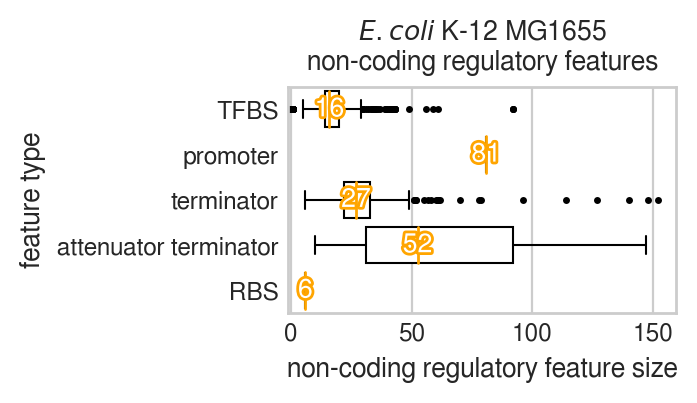

In [69]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("muted")
sns.set_context("paper")
# sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


import matplotlib.patheffects as path_effects

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
#         text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',  # for decimal medians
        text = ax.text(x, y, str(int(value)),
                       ha='center', va='center',
#                        fontweight='bold',
                       color='white'
                      )
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground=median.get_color()),
            path_effects.Normal(),
        ])

boxplot_kwargs = {
    'boxprops': {'color': 'w', 'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': "black", 'markeredgecolor': "None"}
}

plt.figure(figsize=(2.5, 1.5))
ax = sns.boxplot(
    data=all_feats_len_df,
    x="length",
    y="feature type",
#     order=["operon", "gene", "promoter", "TFBS", "regulon", "pathway", "intergenic", "attenuator terminator", "terminator", "RBS"],
    **boxplot_kwargs
)

ax.set_xlabel("non-coding regulatory feature size")
ax.set_title("$\it{E. coli}$ K-12 MG1655\nnon-coding regulatory features")
ax.tick_params(axis='both', which='both', length=0)
add_median_labels(ax)
ax.set_xlim(-1,)
plt.savefig("fy.svg")

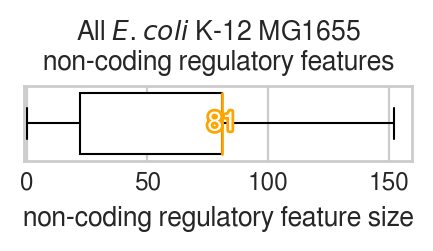

In [66]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_palette("muted")
sns.set_context("paper")
# sns.set_style("ticks")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


import matplotlib.patheffects as path_effects

def add_median_labels(ax):
    lines = ax.get_lines()
    # determine number of lines per box (this varies with/without fliers)
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    # iterate over median lines
    for median in lines[4:len(lines):lines_per_box]:
        # display median value at center of median line
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1]-median.get_xdata()[0]) == 0 else y
#         text = ax.text(x, y, f'{value:.1f}', ha='center', va='center',  # for decimal medians
        text = ax.text(x, y, str(int(value)),
                       ha='center', va='center',
#                        fontweight='bold',
                       color='white'
                      )
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground=median.get_color()),
            path_effects.Normal(),
        ])

boxplot_kwargs = {
    'boxprops': {'color': 'w', 'edgecolor': 'k', 'linewidth': 0.75},
    'whiskerprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'k', 'linewidth': 0.75},
    'medianprops': {'color': 'orange', 'linewidth': 1},
    'capprops': {'color': 'k', 'linewidth': 0.75},
    'flierprops': {'marker': '.', 'markerfacecolor': "black", 'markeredgecolor': "None"}
}

plt.figure(figsize=(2.5, 0.5))
ax = sns.boxplot(
    data=all_feats_len_df,
    x="length",
#     y="feature type",
#     order=["operon", "gene", "promoter", "TFBS", "regulon", "pathway", "intergenic", "attenuator terminator", "terminator", "RBS"],
    **boxplot_kwargs
)

ax.set_xlabel("non-coding regulatory feature size")
ax.set_title("All $\it{E. coli}$ K-12 MG1655\nnon-coding regulatory features")
ax.tick_params(axis='both', which='both', length=0)
add_median_labels(ax)
ax.set_xlim(-1,)
plt.savefig("fy.svg")